![img](images/python.png)

## Part 1 Inspecting and selecting working light curve

* See also [Hannu's tutorial](https://github.com/hpparvi/exo_tutorials/blob/master/01_broadband_parameter_estimation.ipynb)

In [2]:
#check python version
!python --version

Python 3.6.2 :: Continuum Analytics, Inc.


In [3]:
#check environment
import os
os.environ['CONDA_DEFAULT_ENV']

'py3'

## import data

In [4]:
import glob

dirname='./'
fname = os.path.join(dirname,'*.dat')
file_list = glob.glob(fname)
file_list

['./TRAPPIST-1_171105_ID2_comp1.dat']

Let's read the data using pandas dataframe which we abbreviate as `df`.

In [5]:
import pandas as pd

#df means dataframe
df=pd.read_csv("TRAPPIST-1_171105_ID2_comp1.dat", delimiter=' ', parse_dates=True)

In [15]:
df[9:10]

,GJD-2450000,flux,err,airmass,sky,dx,dy,baserun
9,8062.882078,1.001618,0.003956,0.0,508.0,-0.566,-1.874,MSCT2_1711050060


In [16]:
df.columns

Index(['GJD-2450000', 'flux', 'err', 'airmass', 'sky', 'dx', 'dy', 'baserun'], dtype='object')

In [17]:
#remove unnecessary columns
df=df.drop(['baserun'],axis=1)
df.head(3)

,GJD-2450000,flux,err,airmass,sky,dx,dy
0,8062.876429,0.997372,0.004839,1.5601,1109.5,-0.027,-2.954
1,8062.877054,1.003590,0.004729,1.5560,979.8,-0.084,-2.454
2,8062.877679,1.003489,0.004581,1.5516,875.4,-0.130,-1.302


How many data points do we have?

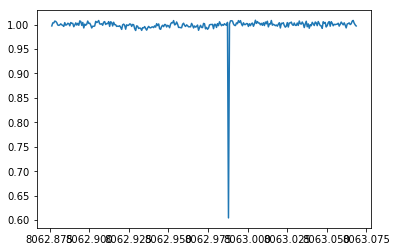

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

time=df['GJD-2450000']
flux=df['flux']
err=df['err']

plt.plot(time,flux)

Let's use pyplot as our main plotting tool.

## Removing outliers

We can remove outliers in Python using many ways. Let's use astropy package which has a library called `sigma_clip` that removes outliers (also called clipping) if the outlier is some multiple of sigma from the mean. Visit the documentation online or use Jupyter's (?) to read the documentation that is written together with the Python code.

In [19]:
#using astropy
from astropy.stats import sigma_clip

#sigma_clip?

In [20]:
clip = sigma_clip(flux,sigma=5)

The result saved in `clip` has two parts:
* (original) data
* mask

Mask is just a vector of True or False: True if the given data point is an outlier; and False if it is not.

In [21]:
clip.mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

You can see above that there is only one True label. We can apply this mask to the data using the following:

In [22]:
flux[clip.mask]

177    0.604277
Name: flux, dtype: float64

In [23]:
#get the value
flux[clip.mask].values[0]

0.60427700000000006

In [24]:
#get the index
idx=flux[clip.mask].index.values[0]
idx

177

That's correct. 

However, we need to save the good data and remove the bad data. So the mask should be inverted to give us the good data. The mask can be inverted (True --> False and False --> True) using the tilde (~) operator.

Let's apply this inverted mask to save only the good data.

Now, the length of both flux and time must be less than one compared before.

Note above that we applied the mask to time vector too.
This is because we need to have equal number of data points
for flux and time vectors when we plot.

In [25]:
df2 = df.drop(df.index[idx], axis=0)

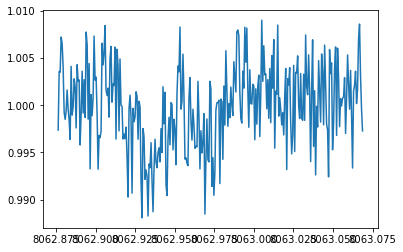

In [26]:
time=df2['GJD-2450000']
flux=df2['flux']
err=df2['err']

plt.plot(time,flux)

We cannot plot yet because we need to remove the outliers in `err` just like what we did with `time` and `flux` vectors.

Now let's plot with error bars.

<Container object of 3 artists>

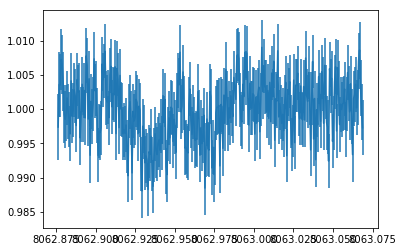

In [27]:
plt.errorbar(time, flux, yerr=err)

Finally, we can plot the results to confirm if there are needed no obvious outliers in each band.

In [29]:
df.index

RangeIndex(start=0, stop=306, step=1)

In [36]:
df_air= df2[(df2["airmass"]>0.5)]

In [37]:
df_air.head(10)

,GJD-2450000,flux,err,airmass,sky,dx,dy
0,8062.876429,0.997372,0.004839,1.5601,1109.5,-0.027,-2.954
1,8062.877054,1.003590,0.004729,1.5560,979.8,-0.084,-2.454
2,8062.877679,1.003489,0.004581,1.5516,875.4,-0.130,-1.302
3,8062.878316,1.007227,0.004478,1.5472,785.1,-0.433,0.046
4,8062.878941,1.006522,0.004346,1.5433,710.6,0.116,-1.458
5,8062.879566,1.004026,0.004253,1.5394,649.7,-0.694,-1.532
6,8062.880214,0.999233,0.004207,1.5351,601.6,-0.494,-2.036
7,8062.880839,0.998504,0.004166,1.5312,563.4,0.183,-0.653
8,8062.881453,0.999367,0.004091,1.5275,535.3,0.050,-0.552
10,8062.882714,0.999628,0.004023,1.5196,484.6,-0.455,-0.980


# Mask

In [29]:
df3= df2[~((df2["GJD-2450000"]>8062.955) & (df2["GJD-2450000"]< 8062.99))]

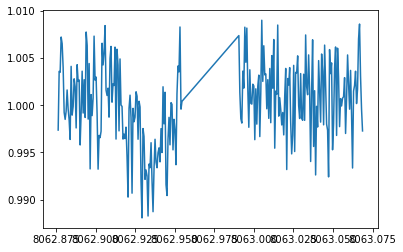

In [30]:
time=df3['GJD-2450000']
flux=df3['flux']
err=df3['err']

plt.plot(time,flux)

## Save

Finally, save the data for later.

In [31]:
fname='TRAPPIST-1_rad13_temp1.csv'
df2.to_csv(fname)

In [32]:
fname='TRAPPIST-1_rad13_temp2.csv'
df3.to_csv(fname)

In [38]:
fname='TRAPPIST-1_rad13_temp3.csv'
df_air.to_csv(fname)

# Appendix

Removing outliers in pandas has a difficult syntax (for beginners). But using pandas is efficient because it can remove outliers in all columns of our data in just one line as shown below.

First, let's reload the original data.

In [37]:
name               = 'hatp44'
date               = '170215'
target_star_id     = '2'
comparison_star_id = '1'
radii_range        = '9-14'

#g-band
b                  = 'g'

#filename
fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
path = os.path.join(dirname,fname)

In [38]:
import pandas as pd

#df means dataframe
df=pd.read_csv(path, delimiter=' ', parse_dates=True)
#remove unnecessary columns
df=df.drop(['frame','Unnamed: 20'],axis=1)

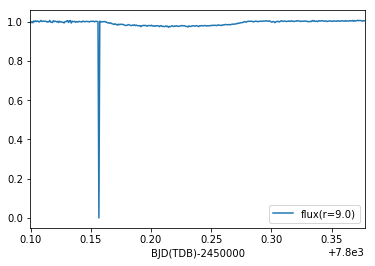

In [39]:
import matplotlib.pyplot as pl

df.plot(x='BJD(TDB)-2450000',y='flux(r=9.0)')

In [40]:
#using pandas
sigma = 5
df=df[np.abs(df-df.mean())<=(sigma*df.std())]

Outliers in any column or row are treated as NaN. It is better to remove them completely using `dropna`.

In [41]:
df = df.dropna()

In [42]:
#set time as index
df = df.set_index('BJD(TDB)-2450000')
df.head(3)

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099692,1.9196,2564.1,-1.522,-0.067,10.40,13180.2,0.997805,0.002302,0.997585,0.002328,0.998154,0.002375,0.998058,0.002436,0.998373,0.002509,0.998092,0.002590
7800.100433,1.9102,2560.6,-1.843,0.175,10.10,13581.1,0.995643,0.002284,0.996653,0.002313,0.998239,0.002361,1.000560,0.002426,1.001977,0.002499,1.003748,0.002583
7800.101185,1.9007,2572.5,-1.062,-0.709,9.63,13743.7,1.001389,0.002297,1.001252,0.002325,1.001248,0.002374,1.000594,0.002434,1.001619,0.002509,1.001948,0.002590


Check if outliers are already removed.

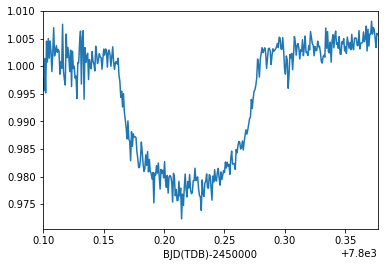

In [43]:
col = 'flux(r=9.0)'
df[col].plot()

Now, do the entire process, this time using pandas.

In [44]:
import numpy as np

data             = {} # a dictionary containing original data
data_no_outliers = {} # a dictionary without outliers

bands   = ['g','r','z']
sigma   = 5 

#iterate from g to z
for b in bands:
    fname = 'lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+\
            comparison_star_id+'_r'+radii_range+'.bjd.dat'
    
    #combine directory name and filename above
    path  = os.path.join(dirname,fname)
    
    #read data and save into a dataframe
    df=pd.read_csv(path, delimiter=' ', parse_dates=True)
    
    #remove columns (axis=1) with names specified
    df=df.drop(['Unnamed: 20','frame'],axis=1)
    
    #set time as index of the dataframe
    #df=df.set_index('BJD(TDB)-2450000')
    
    #save the dataframe with key "b" into data dictionary
    data[b]=df
    
    #identify outliers and save result to df2
    df2 = df[np.abs(df-df.mean())<=(sigma*df.std())]
    
    #just in case there is outlier try the following:
    df2 = df2.dropna()
    
    #save df2 (without outliers) into a new dictionary named data2
    data_no_outliers[b]=df2

Finally, plot using pyplot.

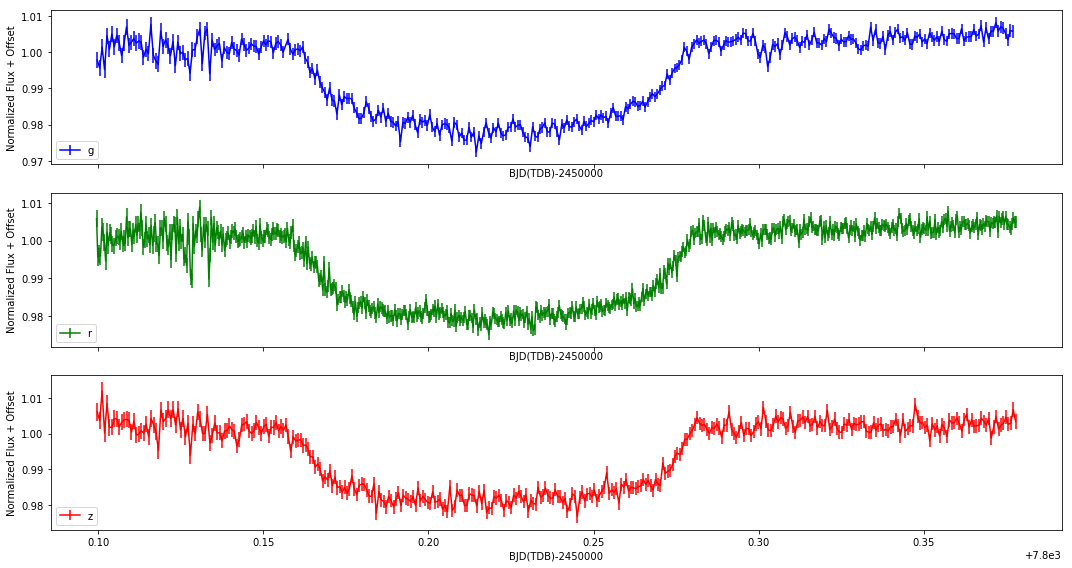

In [45]:
colors = ['b','g','r']

#since there are 3 plots, use subplot
fig, ax = pl.subplots(nrows=3,ncols=1,figsize=(15,8), sharex=True)
#sharex means the 3 subplots have similar x-axis labels

#make a counter to determine which subplot to use
n=0

# for each band and color do the following:
for b,c in zip(bands,colors):
    
    #get df from dictionary
    df = data_no_outliers[b]
    
    time = df['BJD(TDB)-2450000']
    flux = df['flux(r=9.0)']
    err  = df['err(r=9.0)']
    
    #plot with specific label (for legend) and color
    ax[n].errorbar(time, flux, yerr=err, label=b, color=c)
    
    #add plot labels
    ax[n].set_xlabel('BJD(TDB)-2450000')
    ax[n].set_ylabel('Normalized Flux + Offset')
    ax[n].legend(loc='lower left')
    
    #increase the axis counter
    n=n+1
    
#make better spacing
fig.tight_layout()

Indeed, we get the same results!